In [1]:
import pandas as pd

fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]
#these files are from the US Federal Reserve, CPIAUSCL is the US inflation measure, RRVR is rental vacancy rate quarterly, MORGTGAGE is mortgage interest rates weekly'''

dfs = [pd.read_csv(f, parse_dates=True, index_col = 0) for f in fed_files] ##parse any dates it finds in these files into date format, use first column for row indices

In [2]:
dfs[0] #mortgage rates are listed every week

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2023-02-16,6.32
2023-02-23,6.50
2023-03-02,6.65


In [3]:
dfs[1] #rental vacany rates are quarterly, need to merge datasets

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-10-01,5.6
2022-01-01,5.8
2022-04-01,5.6


In [4]:
dfs[2] #inflation monthly, all datasets on different timelines

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-10-01,297.987
2022-11-01,298.598
2022-12-01,298.990


In [5]:
fed_data = pd.concat(dfs, axis = 1) #combines dataframes into one big dataframe

In [6]:
fed_data #NaN is for gaps and missing values because everything is on different timelines

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2023-02-16,6.32,NaN,NaN
2023-02-23,6.50,NaN,NaN
2023-03-02,6.65,NaN,NaN


In [7]:
fed_data.tail(50) #last datasets for a visual perspective of gaps, e.g inflations come out on the first of the month

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-05-26,5.10,NaN,NaN
2022-06-01,NaN,NaN,294.728
2022-06-02,5.09,NaN,NaN
2022-06-09,5.23,NaN,NaN
2022-06-16,5.78,NaN,NaN
2022-06-23,5.81,NaN,NaN
2022-06-30,5.70,NaN,NaN
2022-07-01,NaN,6.0,294.628
2022-07-07,5.30,NaN,NaN


In [8]:
fed_data = fed_data.ffill() #forward filling, assuming the rates will stay constant for the period they're released for e.g rental vacancy rates stay constant for the whole quarter

In [9]:
fed_data.tail(50) #now all values are filled in and there are no missing values

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-05-26,5.10,5.6,291.268
2022-06-01,5.10,5.6,294.728
2022-06-02,5.09,5.6,294.728
2022-06-09,5.23,5.6,294.728
2022-06-16,5.78,5.6,294.728
2022-06-23,5.81,5.6,294.728
2022-06-30,5.70,5.6,294.728
2022-07-01,5.70,6.0,294.628
2022-07-07,5.30,6.0,294.628


In [10]:
zillow_files = ["zillow_median_sale_price.csv", "zillow_home_value_index.csv"] #loading zillow data
#first file is the median sale price which is the median sale price for all houses in US per week
#second dataset is the zillow computed house value

dfs = [pd.read_csv(f) for f in zillow_files]

In [11]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-12-03,2022-12-10,2022-12-17,2022-12-24,2022-12-31,2023-01-07,2023-01-14,2023-01-21,2023-01-28,2023-02-04
0,102001,0,United States,country,NaN,183000.0,179900.0,180000.0,175000.0,181900.0,...,326000.0,325000.0,322938.0,322500.0,319000.0,318000.0,324500.0,317500.0,315000.0,320000.0
1,394913,1,"New York, NY",msa,NY,399810.0,410000.0,412740.0,410000.0,390000.0,...,515000.0,530000.0,510000.0,515000.0,515000.0,530000.0,520000.0,515000.0,528000.0,520000.0
2,753899,2,"Los Angeles, CA",msa,CA,475000.0,501500.0,520000.0,523250.0,489000.0,...,815000.0,812500.0,820000.0,800000.0,807250.0,850000.0,799500.0,799000.0,800000.0,860000.0
3,394463,3,"Chicago, IL",msa,IL,238000.0,235500.0,235000.0,244750.0,245000.0,...,275000.0,275000.0,275000.0,269000.0,275000.0,257000.0,275000.0,275000.0,265000.0,275000.0
4,394514,4,"Dallas, TX",msa,TX,133250.0,137790.0,130500.0,136000.0,139900.0,...,375000.0,360000.0,360000.0,357000.0,359900.0,359000.0,352500.0,350000.0,350000.0,366263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,394723,288,"Jefferson City, MO",msa,MO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238000.0
189,395182,291,"Valdosta, GA",msa,GA,NaN,NaN,NaN,NaN,NaN,...,223700.0,194950.0,224000.0,185000.0,177400.0,200500.0,240000.0,190000.0,216700.0,203000.0
190,395232,303,"Winchester, VA",msa,VA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310000.0
191,394442,316,"Carbondale, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119000.0,95000.0


In [12]:
dfs = [pd.DataFrame(df.iloc[33,5:]) for df in dfs] #iloc is locating columns by position, 5: means columns following 5
#only looking at indianapolis region from all the regions, takes row 33 and deletes the 5 columns after
#other IN regions were Evansville, Bloomington, Lafayette, South Bend and Fort Wayne for which we aren't interested in


In [13]:
dfs[0] #median house price for houses sold every week in Indianapolis

,33
2008-02-02,130000.0
2008-02-09,128000.0
2008-02-16,131900.0
2008-02-23,120410.0
2008-03-01,130000.0
...,...
2023-01-07,179950.0
2023-01-14,169500.0
2023-01-21,186500.0
2023-01-28,175000.0


In [14]:
dfs[1] #house value data that comes out every month, data doesnt exist for the first few years

,33
1996-02-29,NaN
1996-03-31,NaN
1996-04-30,NaN
1996-05-31,NaN
1996-06-30,NaN
...,...
2022-10-31,265534.121794
2022-11-30,264066.198766
2022-12-31,261139.360988
2023-01-31,259504.728476


In [15]:
dfs = [pd.DataFrame(df.dropna(how = "all")) for df in dfs] ##removes the "NaN" values from the hvi dataset.

In [16]:
dfs[1] #removed a decent amount of values

,33
1999-07-31,124692.579903
1999-08-31,121324.791122
1999-09-30,122690.821529
1999-10-31,117432.35229
1999-11-30,112507.101633
...,...
2022-10-31,265534.121794
2022-11-30,264066.198766
2022-12-31,261139.360988
2023-01-31,259504.728476


In [17]:
dfs[0]

,33
2008-02-02,130000.0
2008-02-09,128000.0
2008-02-16,131900.0
2008-02-23,120410.0
2008-03-01,130000.0
...,...
2023-01-07,179950.0
2023-01-14,169500.0
2023-01-21,186500.0
2023-01-28,175000.0


In [18]:
for df in dfs:
  df.index = pd.to_datetime(df.index)  #the row indices on the left are converted to pandas datetime format
  df["month"] = df.index.to_period("M")
  #this will cutoff the day part and only have the month part from the dates on the left, gives us a column to join the two datasets


In [19]:
dfs[1]

,33,month
1999-07-31,124692.579903,1999-07
1999-08-31,121324.791122,1999-08
1999-09-30,122690.821529,1999-09
1999-10-31,117432.35229,1999-10
1999-11-30,112507.101633,1999-11
...,...,...
2022-10-31,265534.121794,2022-10
2022-11-30,264066.198766,2022-11
2022-12-31,261139.360988,2022-12
2023-01-31,259504.728476,2023-01


In [20]:
price_data = dfs[0].merge(dfs[1], on = "month")
#on is the column we want to merge on, rows with the same values in both datasets will be merged
#pandas will look at both dataframes and match months and combine data for that month in both dataframes

In [21]:
price_data.index = dfs[0].index
#make sure index of the dataframe is the same as the index of our first dataframe

In [22]:
price_data ##_x is average sales price for each house and _y is the average value of each house

,33_x,month,33_y
2008-02-02,130000.0,2008-02,126612.921836
2008-02-09,128000.0,2008-02,126612.921836
2008-02-16,131900.0,2008-02,126612.921836
2008-02-23,120410.0,2008-02,126612.921836
2008-03-01,130000.0,2008-03,126131.683643
...,...,...,...
2023-01-07,179950.0,2023-01,259504.728476
2023-01-14,169500.0,2023-01,259504.728476
2023-01-21,186500.0,2023-01,259504.728476
2023-01-28,175000.0,2023-01,259504.728476


In [23]:
del price_data["month"] #we dont need month columnn because we already merged it using month and we have dates already
price_data.columns = ["price", "value"] ##renaming columns

In [24]:
price_data #data ready for ML

,price,value
2008-02-02,130000.0,126612.921836
2008-02-09,128000.0,126612.921836
2008-02-16,131900.0,126612.921836
2008-02-23,120410.0,126612.921836
2008-03-01,130000.0,126131.683643
...,...,...
2023-01-07,179950.0,259504.728476
2023-01-14,169500.0,259504.728476
2023-01-21,186500.0,259504.728476
2023-01-28,175000.0,259504.728476


In [25]:
fed_data = fed_data.dropna() #drop missing values in fed data for economic indicators

In [26]:
fed_data #deletes empty data values

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2023-02-16,6.32,5.8,301.648
2023-02-23,6.50,5.8,301.648
2023-03-02,6.65,5.8,301.648


In [27]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-11-17,6.61,5.8,298.598
2022-11-23,6.58,5.8,298.598
2022-12-01,6.49,5.8,298.990
2022-12-08,6.33,5.8,298.990
2022-12-15,6.31,5.8,298.990
2022-12-22,6.27,5.8,298.990
2022-12-29,6.42,5.8,298.990
2023-01-01,6.42,5.8,300.536
2023-01-05,6.48,5.8,300.536


In [28]:
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days = 2) #will shift all the days by 2 days
#aligns fed data with zillow data
#fed releases their data on a tuesday and zillow releases on thursday which leaves a 2 day gap and we need these values to be aligned to perform ML functions

In [29]:
fed_data #shifted forwards by 2 days, we can merge the data with zillow data because dates are consistent

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2023-02-18,6.32,5.8,301.648
2023-02-25,6.50,5.8,301.648
2023-03-04,6.65,5.8,301.648


In [30]:
price_data = fed_data.merge(price_data, left_index = True, right_index = True)
#tells pandas to combine the two data frames, saying use the index which is the date to merge them

In [31]:
price_data #single data frame with both fed an zillow data, anything that didn't match was removed

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643
...,...,...,...,...,...
2023-01-07,6.48,5.8,300.536,179950.0,259504.728476
2023-01-14,6.33,5.8,300.536,169500.0,259504.728476
2023-01-21,6.15,5.8,300.536,186500.0,259504.728476
2023-01-28,6.13,5.8,300.536,175000.0,259504.728476


In [32]:
price_data.columns = ["mort_interest%", "vacancy", "cpi", "price", "value"] #change column nmes

In [33]:
price_data

,mort_interest%,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643
...,...,...,...,...,...
2023-01-07,6.48,5.8,300.536,179950.0,259504.728476
2023-01-14,6.33,5.8,300.536,169500.0,259504.728476
2023-01-21,6.15,5.8,300.536,186500.0,259504.728476
2023-01-28,6.13,5.8,300.536,175000.0,259504.728476


<AxesSubplot:>

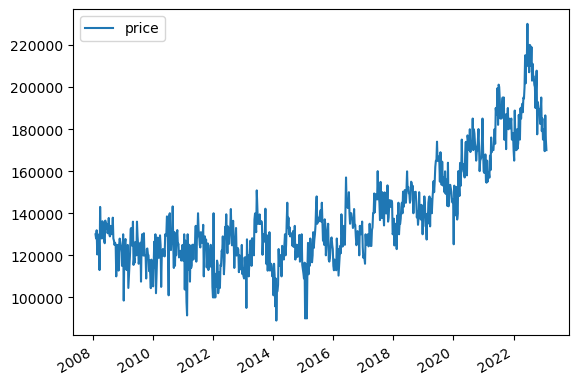

In [34]:
price_data.plot.line(y = "price", use_index = True) #house prices in Indianapolis overtime

In [35]:
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100
#inflation makes things expensive so we take out inflation by dividing by cpi and multiplying by 100 because cpi is in units of hundred
#makes a new column called adj_price

<AxesSubplot:>

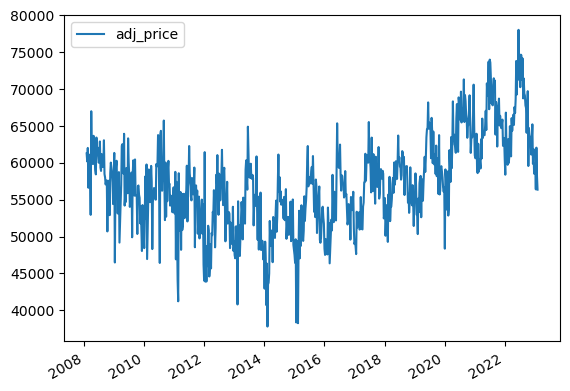

In [36]:
price_data.plot.line(y = "adj_price", use_index = True)
#shows what happens to the underline house value change without inflation

In [37]:
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100
#price is the average price houses sold for, value is the zillow computed average value of houses in indianapolis
#creating adj_value column

In [38]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)
#grabs adj price from 3 months into the future and pulls it back to the current row, 13 because 3 months is almost 13 weeks
#as seen below, next_quarter value is higher than adj price, next_quarter is the average sales price of the house 3 months from the listed date

In [39]:
price_data #last values are missing because there's no data 13 rows ahead of them

,mort_interest%,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836,61270.466692,59674.09854,61568.343184
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836,60182.333664,59530.164907,60406.676332
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836,62016.014143,59530.164907,59012.676109
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836,56613.709348,59530.164907,58431.842682
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643,61122.682628,59303.898989,63427.010148
...,...,...,...,...,...,...,...,...
2023-01-07,6.48,5.8,300.536,179950.0,259504.728476,59876.354247,86347.302312,NaN
2023-01-14,6.33,5.8,300.536,169500.0,259504.728476,56399.23337,86347.302312,NaN
2023-01-21,6.15,5.8,300.536,186500.0,259504.728476,62055.793649,86347.302312,NaN
2023-01-28,6.13,5.8,300.536,175000.0,259504.728476,58229.296989,86347.302312,NaN


In [40]:
price_data.dropna(inplace = True) #cant use the NaN rows for training

In [41]:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)
#is the price 3 months from now higher or lower than the current price, returns boolean, 1 is true, 0 is false

In [42]:
price_data

,mort_interest%,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836,61270.466692,59674.09854,61568.343184,1
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836,60182.333664,59530.164907,60406.676332,1
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836,62016.014143,59530.164907,59012.676109,0
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836,56613.709348,59530.164907,58431.842682,1
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643,61122.682628,59303.898989,63427.010148,1
...,...,...,...,...,...,...,...,...,...
2022-10-01,6.70,6.0,296.539,200000.0,265534.121794,67444.754316,89544.418034,59876.354247,0
2022-10-08,6.66,5.8,297.987,207750.0,265534.121794,69717.806481,89109.297316,56399.23337,0
2022-10-15,6.92,5.8,297.987,177500.0,265534.121794,59566.356922,89109.297316,62055.793649,1
2022-10-22,6.94,5.8,297.987,192850.0,265534.121794,64717.588351,89109.297316,58229.296989,0


In [43]:
price_data["change"].value_counts() #want these values to be around the same

0    396
1    355
Name: change, dtype: int64

In [44]:
predictors = ["mort_interest%", "vacancy", "adj_price", "adj_value"] #use these columns to predict target column
target = "change"

In [45]:
price_data

,mort_interest%,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836,61270.466692,59674.09854,61568.343184,1
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836,60182.333664,59530.164907,60406.676332,1
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836,62016.014143,59530.164907,59012.676109,0
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836,56613.709348,59530.164907,58431.842682,1
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643,61122.682628,59303.898989,63427.010148,1
...,...,...,...,...,...,...,...,...,...
2022-10-01,6.70,6.0,296.539,200000.0,265534.121794,67444.754316,89544.418034,59876.354247,0
2022-10-08,6.66,5.8,297.987,207750.0,265534.121794,69717.806481,89109.297316,56399.23337,0
2022-10-15,6.92,5.8,297.987,177500.0,265534.121794,59566.356922,89109.297316,62055.793649,1
2022-10-22,6.94,5.8,297.987,192850.0,265534.121794,64717.588351,89109.297316,58229.296989,0


In [93]:
price_data_debug = price_data.copy(deep = True)
price_data_debug

,mort_interest%,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,mort_interest%_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836,61270.466692,59674.09854,61568.343184,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836,60182.333664,59530.164907,60406.676332,1,0.999119,1.000000,0.991041,0.998793
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836,62016.014143,59530.164907,59012.676109,0,1.005272,1.000000,1.014058,0.999195
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836,56613.709348,59530.164907,58431.842682,1,1.045435,1.000000,0.943237,0.999396
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643,61122.682628,59303.898989,63427.010148,1,1.063032,1.000000,1.014635,0.996475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,6.70,6.0,296.539,200000.0,265534.121794,67444.754316,89544.418034,59876.354247,0,1.507638,1.042084,1.009125,1.001937
2022-10-08,6.66,5.8,297.987,207750.0,265534.121794,69717.806481,89109.297316,56399.23337,0,1.474518,1.007348,1.042473,0.996574
2022-10-15,6.92,5.8,297.987,177500.0,265534.121794,59566.356922,89109.297316,62055.793649,1,1.506994,1.007348,0.891357,0.996235
2022-10-22,6.94,5.8,297.987,192850.0,265534.121794,64717.588351,89109.297316,58229.296989,0,1.486755,1.006676,0.969252,0.995728


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

START = 260 #5 years worth of data
STEP = 52 #52 weeks in a year

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
  #min sample split protects against overfitting, prevents the nodes in a random forest tree from oversplitting
  #random state means everytime we run this model, it'll generate the same sequence of random numbers, give us the same results everytime
    rf.fit(train[predictors], train[target]) #train model on training set
    preds = rf.predict(test[predictors]) #predict model on the test set
    return preds

def backtest(data, predictors, target):
    #backtesting will let us make predictions for most of the dataset but prevent us from making predictions for the past from the future
    all_preds = []
    for i in range(START, data.shape[0], STEP): #make predictions for the next year
        train = price_data.iloc[:i] #split up data everything up to i
        test = price_data.iloc[i:(i + STEP)]
        all_preds.append(predict(train, test, predictors, target))

    preds = np.concatenate(all_preds) #concatenate into one array that has all predictions
    return preds, accuracy_score(data.iloc[START:][target], preds) 

In [103]:
preds, accuracy = backtest(price_data, predictors, target)

In [104]:
accuracy

0.6089613034623218

In [105]:
yearly = price_data.rolling(52, min_periods = 1).mean() 
#even if we have 1 period of data, don't return NaN 

In [106]:
yearly

,mort_interest%,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,mort_interest%_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.680000,10.100000,212.174000,130000.000000,126612.921836,61270.466692,59674.098540,61568.343184,1.000000,1.000000,1.000000,1.000000,1.000000
2008-02-09,5.675000,10.100000,212.430500,129000.000000,126612.921836,60726.400178,59602.131723,60987.509758,1.000000,0.999559,1.000000,0.995520,0.999396
2008-02-16,5.690000,10.100000,212.516000,129966.666667,126612.921836,61156.271500,59578.142785,60329.231875,0.666667,1.001464,1.000000,1.001700,0.999329
2008-02-23,5.777500,10.100000,212.558750,127577.500000,126612.921836,60020.630962,59566.148315,59854.884577,0.750000,1.012457,1.000000,0.987084,0.999346
2008-03-01,5.870000,10.100000,212.584400,128062.000000,126516.674197,60241.041295,59513.698450,60569.309691,0.800000,1.022572,1.000000,0.992594,0.998772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,4.444038,5.757692,287.650769,192434.326923,257199.327257,66834.912282,89371.305753,66192.170483,0.442308,1.297054,0.972002,1.010215,1.035034
2022-10-08,4.516731,5.757692,288.111519,192871.826923,257731.476614,66877.344153,89415.672851,66153.951538,0.442308,1.306157,0.973718,1.010503,1.033951
2022-10-15,4.591923,5.757692,288.572269,193007.211538,258225.226152,66826.594823,89446.026847,66062.554380,0.442308,1.315031,0.975402,1.009419,1.032740
2022-10-22,4.667885,5.761538,288.985058,193119.711538,258718.975690,66770.669168,89491.562696,65991.479294,0.442308,1.323664,0.977635,1.008269,1.031744


In [107]:
yearly_ratios = [p + "_year" for p in predictors] #add yearly ratios
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
#taking the individual column data and dividing it by the average yearly version of that column
#gives a good info about how the model is trending

In [108]:
price_data

,mort_interest%,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,mort_interest%_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,130000.0,126612.921836,61270.466692,59674.09854,61568.343184,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,128000.0,126612.921836,60182.333664,59530.164907,60406.676332,1,0.999119,1.000000,0.991041,0.998793
2008-02-16,5.72,10.1,212.687,131900.0,126612.921836,62016.014143,59530.164907,59012.676109,0,1.005272,1.000000,1.014058,0.999195
2008-02-23,6.04,10.1,212.687,120410.0,126612.921836,56613.709348,59530.164907,58431.842682,1,1.045435,1.000000,0.943237,0.999396
2008-03-01,6.24,10.1,212.687,130000.0,126131.683643,61122.682628,59303.898989,63427.010148,1,1.063032,1.000000,1.014635,0.996475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,6.70,6.0,296.539,200000.0,265534.121794,67444.754316,89544.418034,59876.354247,0,1.507638,1.042084,1.009125,1.001937
2022-10-08,6.66,5.8,297.987,207750.0,265534.121794,69717.806481,89109.297316,56399.23337,0,1.474518,1.007348,1.042473,0.996574
2022-10-15,6.92,5.8,297.987,177500.0,265534.121794,59566.356922,89109.297316,62055.793649,1,1.506994,1.007348,0.891357,0.996235
2022-10-22,6.94,5.8,297.987,192850.0,265534.121794,64717.588351,89109.297316,58229.296989,0,1.486755,1.006676,0.969252,0.995728


In [109]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [111]:
accuracy #accuracy improved to 72% by adding yearly ratios

0.7230142566191446

In [112]:
pred_match = (preds == price_data[target].iloc[START:]) 
#checking where are predictions were right
#comparing predicted values to actual values
#true if it's alligned, false if it's not

In [113]:
pred_match[pred_match == True] = "green" 
pred_match[pred_match == False] = "red"
#assign colors to eatch match, if it's true then it's green and if it's false it's red

<AxesSubplot:xlabel='index', ylabel='adj_price'>

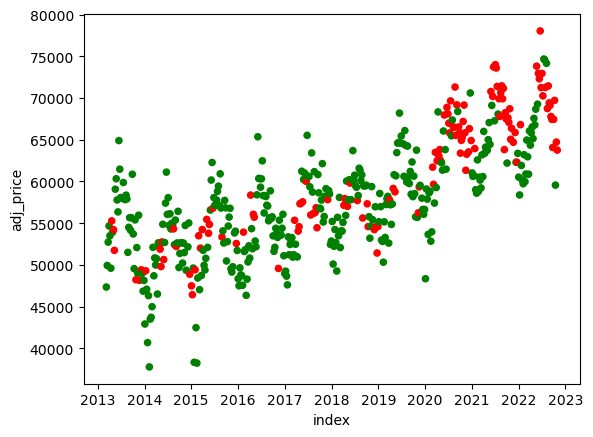

In [114]:
import matplotlib.pyplot as plt
plot_data = price_data.iloc[START:].copy()
plot_data.reset_index().plot.scatter(x = "index", y = "adj_price", color = pred_match)
#reset_index turns the index into a column in the dataframe index, otherwise we can't use the index as a column
#shows predictions didn't do well towards the end

In [115]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats = 10, random_state = 1)
#checks to see which variables are the most important data columns

In [117]:
result["importances_mean"] #the higher the value, the more important the column was

array([0.11864181, 0.08628495, 0.37749667, 0.22743009])

In [118]:
predictors

['mort_interest%', 'vacancy', 'adj_price', 'adj_value']